# 학습내용

## 01. 기본 개념 이해하기

- **샘플(sample) or 데이터 포인터(data point)**: 하나의 개체 혹은 행을 말한다.
- 특성 or 속성(feature): 샘플의 속성, 즉 열을 가르킨다.

***[ 기본 라이브러리 ]***
- scikit-learn : 머신러닝(딥러닝 포함)
- numpy : 선형대수 연산, 난수 생성기, 수학 함수 등
- scipy
- matplotlib, seaborn : 시각화
- pandas : 머신러닝 데이터 처리, 데이터 입출력
- mglearn

### scikit-learn(사이킷 런)

- 오픈 소스입니다.
- 매우 인기 높고 독보적인 파이썬 머신러닝 라이브러리입니다.

### mglearn
- 파이썬 라이브러리를 활용한 머신러닝 저자가 작성한 라이브러리
- 기본 머신러닝 내용 설명을 위한 그래프(knn 알고리즘 설명 등)

In [2]:
import sys
print('파이썬 버전 :', sys.version)

파이썬 버전 : 3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]


In [3]:
import pandas as pd
print('판다스 버전 :', pd.__version__)

판다스 버전 : 1.3.2


In [5]:
import matplotlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

### 직접 해보기1
- matplotlib, numpy, seaborn, scipy의 각각의 버전을 확인해보자.

## 04. 머신러닝 모델을 위한 iris 데이터를 준비

### 데이터 : 붓꽃
- 종류 : setosa, versicolor, virginica
- 데이터 내용: 붓꽃의 꽃잎과 꽃받침
- 우리가 해결하려고 하는 문제: 데이터를 주고 붓꽃의 종류 예측하기

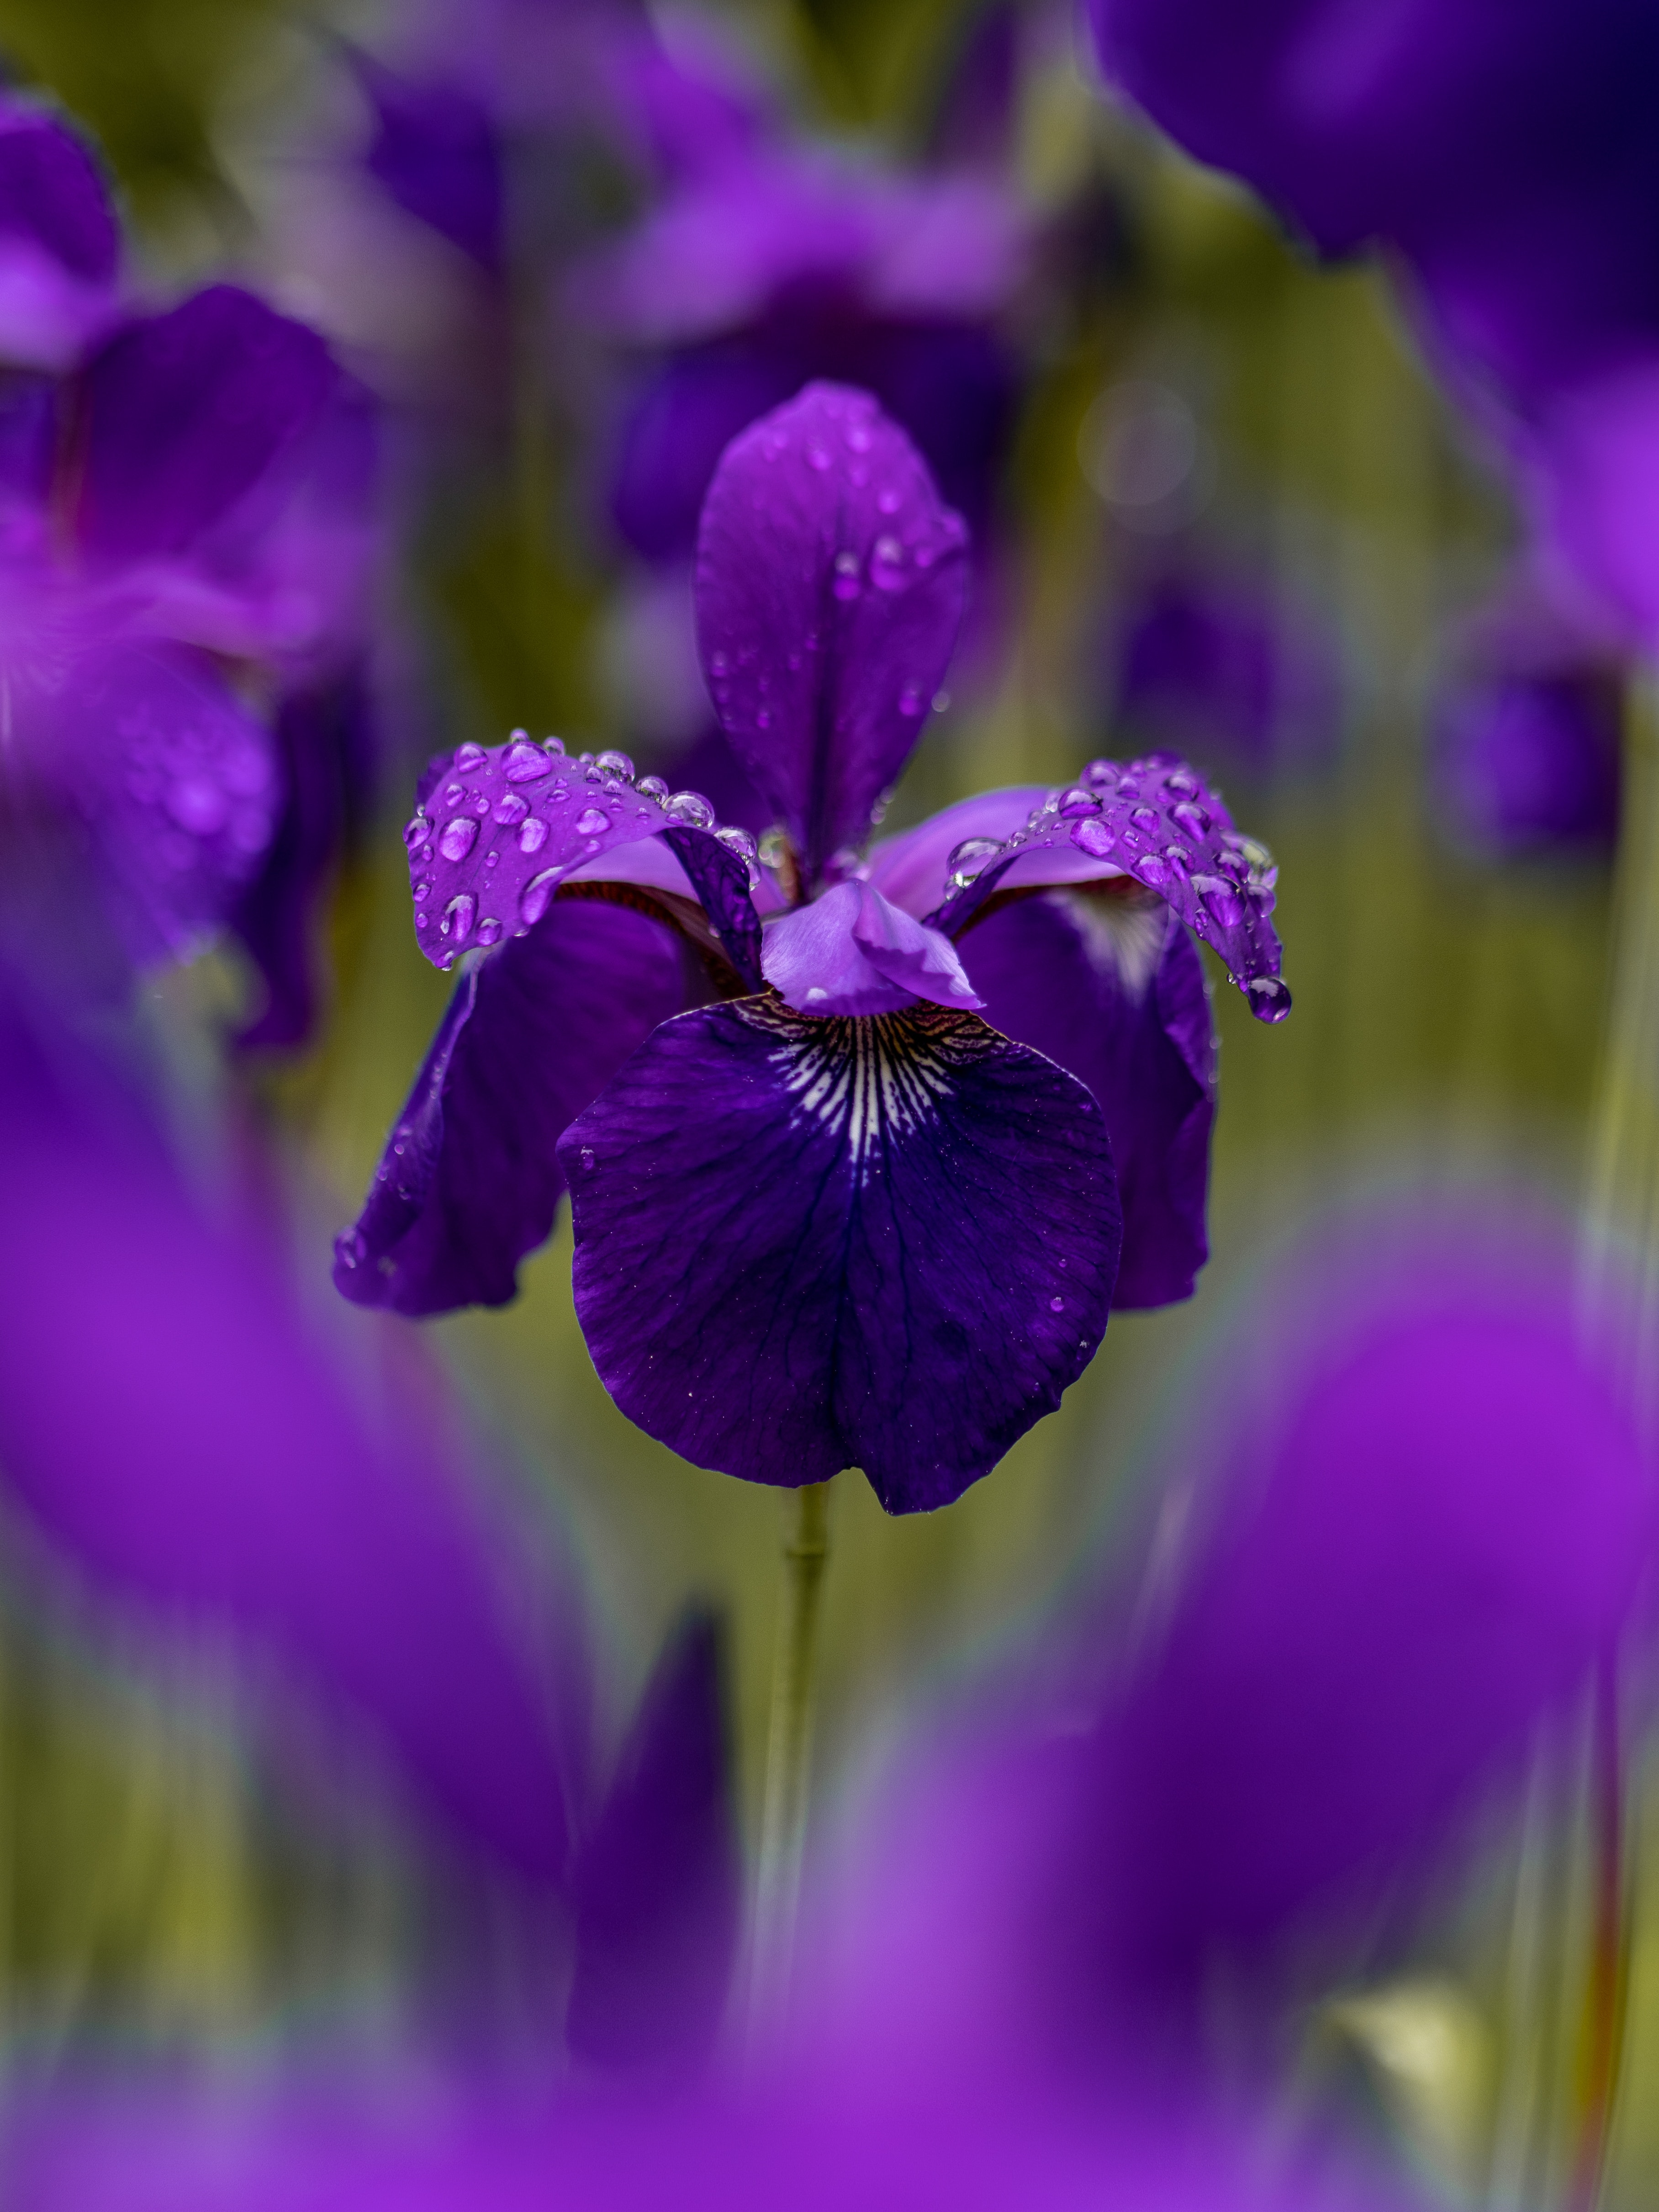

### 붓꽃 데이터의 역사 (추가)

### 데이터 준비

- scikit-learn에서 제공하는 기본 데이터 자료형을 이용한다.
- load_iris가 반환한 iris 객체는 파이썬의 딕셔너리(Dictionary)와 유사한 Bunch 클래스의 객체

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
type(iris)

sklearn.utils._bunch.Bunch

- Bunch는 Numpy로 접근 해야함!!!
- Numpy에 head, tail로 접근할 수 없다.

In [14]:
# iris 데이터 셋의 key값들
print( type(iris) )
print(iris.keys())          # iris가 가진 값들
print(iris['target_names']) # 붓꽃의 label의 종류명
print(iris['target'])       # 붓꽃의 종류의 label의 값 
print(iris['data'])         # 붓꽃의 꽃잎과 꽃받침의 값

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]


In [10]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
print(iris['target'].shape)  # 타켓
print(iris['data'].shape)
print(type(iris['target']) , type(iris['data']) )

(150,)
(150, 4)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [16]:
print( iris['data'].shape )   # iris 데이터의 'data'의 값이 가지는 행열 확인
print( iris['feature_names']) # iris 데이터 셋의 피처이름 확인
print( iris['data'][:5])      # 5개의 데이터 확인
print( iris['target_names'][:5]) 
print( iris['target'][:5]) 

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0]


### 데이터
* 데이터 나누기
    * 학습용 - 머신러닝
        * 입력(피쳐)
        * 출력(타겟)
    * 평가용 - 머신러닝
    
    
    
* 캐글
    * 학습용(train)
        * 자체 학습용
        * 자체 형가용
    * 제출용 파일
    * 평가용 (test)

In [20]:
from sklearn.model_selection import train_test_split

X = iris['data']
y = iris['target']

# 자체 학습용, 자체 평가용, 75%, 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
# 데이터 사이즈
print(X_train.shape)   # 훈련 데이터 셋 사이즈
print(X_test.shape)    # 테스트 데이터 셋 사이즈
print(y_train.shape)   # 훈련 데이터 레이블 사이즈 
print(y_test.shape)    # 테스트 데이터 레이블 사이즈

(112, 4)
(38, 4)
(112,)
(38,)


## 06. 데이터 살펴보기 - 시각화

In [23]:
import seaborn as sns

In [25]:
print(iris['feature_names']) # 붓꽃의 꽃잎과 꽃받침의 feature 이름

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [26]:
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df['species'] = y_train
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  112 non-null    float64
 1   sepal width (cm)   112 non-null    float64
 2   petal length (cm)  112 non-null    float64
 3   petal width (cm)   112 non-null    float64
 4   species            112 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 4.1 KB


In [27]:
iris_df['species'] = iris_df['species'].astype('category') # 자료형 변환
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.9,3.0,4.2,1.5,1
1,5.8,2.6,4.0,1.2,1
2,6.8,3.0,5.5,2.1,2
3,4.7,3.2,1.3,0.2,0
4,6.9,3.1,5.1,2.3,2


### seaborn을 활용한 산점도 행렬 확인

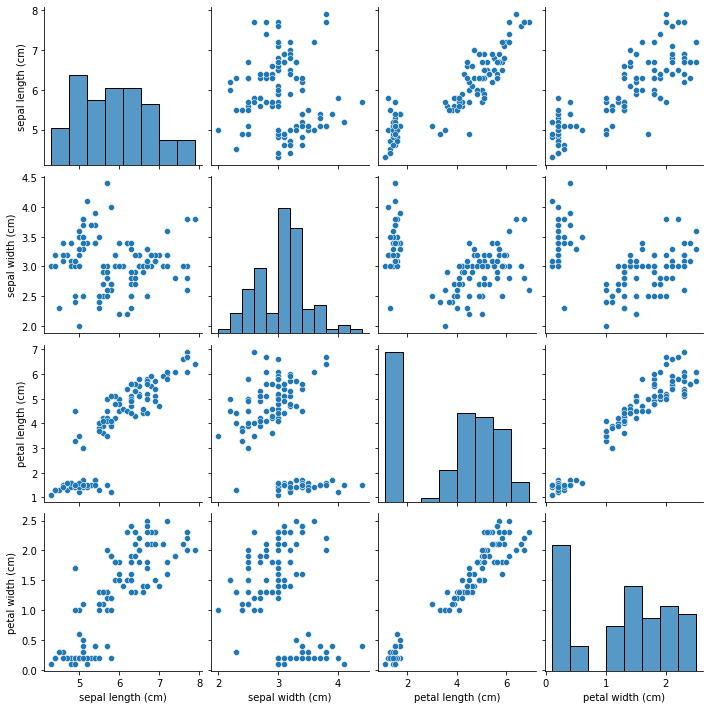

In [28]:
## int32. str, float32
sns.pairplot(iris_df.iloc[:, 0:4])

In [29]:
### 머신러닝 알고리즘은 정규분포일 떄 좋은 성능을 낸다.

### Pandas를 이용한 산점도 행렬 확인

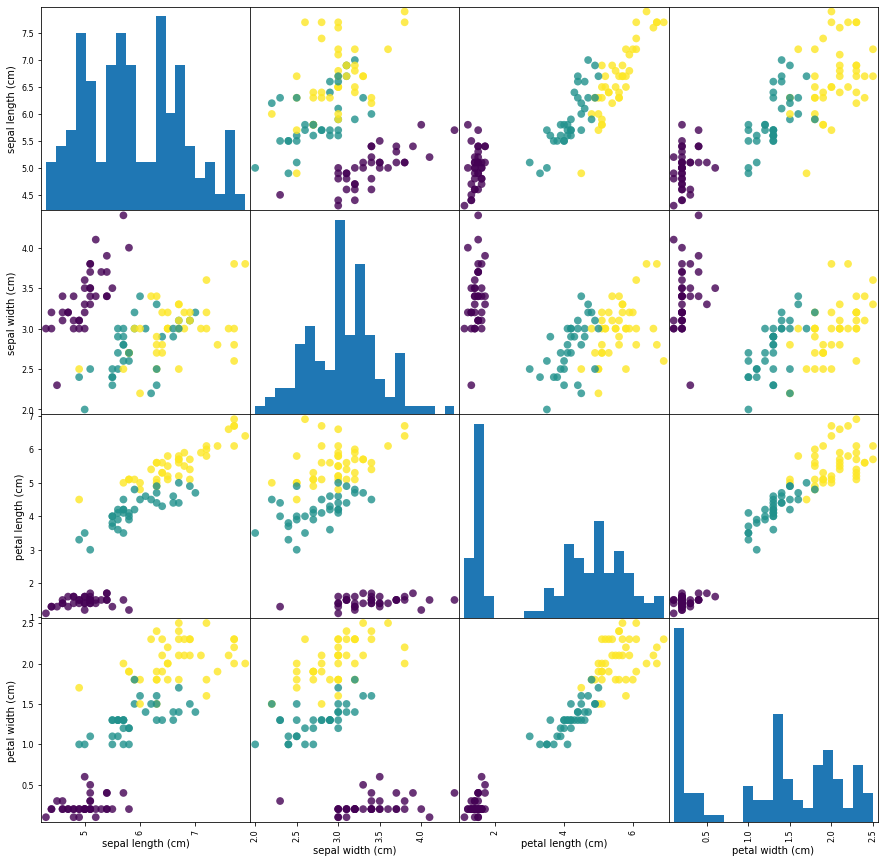

In [31]:
pd.plotting.scatter_matrix(iris_df, c=y_train,     # 색 
                          figsize=(15,15),         # 크기 
                          marker='o',              # 표시
                          hist_kwds={'bins':20},   # 막대의 개수
                          s=60,     # size
                          alpha=0.8 )  # 투명도

plt.show()

## 07. 첫번째 머신러닝 모델 만들기

- K-최근접 이웃(k-nearest neighbors, k-NN 알고리즘)
    - 훈련 데이터에서 새로운 데이터포인트에 가장 가까운 `k개`의 이웃을 찾는다.
    - 이웃들의 클래스 중 빈도가 가장 높은 클래스를 예측값으로 사용

### 모델 만들기

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)  # 2개의 이웃을 기준
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [37]:
print("테스트 세트의 정확도 : {:.2f}".format(np.mean(pred == y_test)))

테스트 세트의 정확도 : 0.97


#### (실습) n_nieghbors의 값을 1~10까지 변경해 보면서 결과값(정확도) 을 출력해 보기

In [66]:
N_list = range(1,11)
#accuracy = []

for n in N_list:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    # accuracy.append(np.mean(pred == y_test))
    print("test{} : {}".format(n, model.score(X_test,y_test) ))
    print('----------------------------')

test1 : 0.9736842105263158
----------------------------
test2 : 0.9736842105263158
----------------------------
test3 : 0.9736842105263158
----------------------------
test4 : 0.9736842105263158
----------------------------
test5 : 0.9736842105263158
----------------------------
test6 : 0.9736842105263158
----------------------------
test7 : 0.9736842105263158
----------------------------
test8 : 0.9736842105263158
----------------------------
test9 : 0.9736842105263158
----------------------------
test10 : 0.9736842105263158
----------------------------


### Knn 회귀와 분류 차이? (정리 필요)